# Basic magnetometer calibration

In [1]:
import time
import struct
import serial
import matplotlib.pyplot as plt

port = "COM4"

x = []
y = []
z = []

samples = 400 # number of samples to collect

try:
    print("opening serial port")
    serialport = serial.Serial(port, 115200, timeout=0.1)
    time.sleep(3)
    serialport.readline()
    print(" collecting {} data samples ".format(samples))
    for i in range(samples):
        line = serialport.readline()
        mx,my,mz = eval(line) 
        x.append(mx)
        y.append(my)
        z.append(mz)
        
except Error:
    pass
finally:
    serialport.close()
    print("closing serial port")





opening serial port
 collecting 400 data samples 
closing serial port


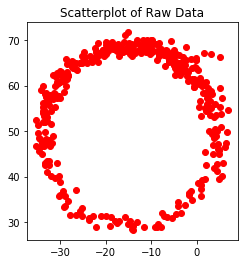

In [2]:
fig, ax = plt.subplots(1, 1)
plt.title("Scatterplot of Raw Data")
ax.set_aspect(1)
ax.scatter(x, y, color='r')
#ax.scatter(y, z, color='b')
#ax.scatter(z, x, color='g')


In [3]:
# offset
cx = (max(x) + min(x)) / 2
cy = (max(y) + min(y)) / 2  
cz = (max(z) + min(z)) / 2  

# normalization
nx = abs(max(x) - cx)
ny = abs(max(y) - cy)
nz = abs(max(z) - cz)

#apply offset
x1 = [ u - cx for u in x]
y1 = [ v - cy for v in y]
z1 = [ w - cz for w in z]

#apply normalisation
x2 = [ u / nx for u in x1]
y2 = [ v / ny for v in y1]
z2 = [ w / nz for w in z1]

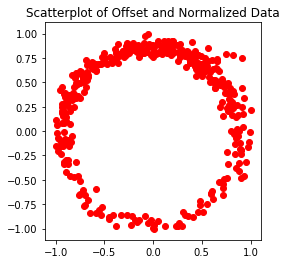

In [4]:
fig, ax = plt.subplots(1, 1)
plt.title("Scatterplot of Offset and Normalized Data")
ax.set_aspect(1)
ax.scatter(x2, y2, color='r')
#ax.scatter(y2, z2, color='b')
#ax.scatter(z2, x2, color='g')

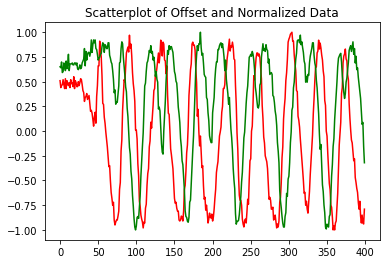

In [6]:

from math import atan2
fig, ax = plt.subplots(1, 1)
plt.title("Plot Showing Phase 90 degree phase")

ax.plot(list(range(len(x2))), x2, color='r')
ax.plot(list(range(len(y2))), y2, color='g')


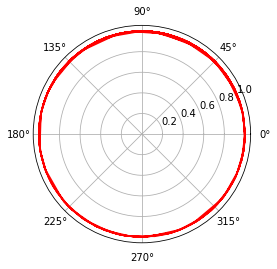

In [16]:
from math import atan, atan2

plt.title("Scatterplot of Offset and Normalized Data")

XY = zip(y2,x2)
radians = []
for xy in XY:
    radians.append(atan2(*xy))
plt.polar(radians, [1] * len(x2), color='r')



